# 1. Data Exploration:
- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset
file_path = "/Users/macbookpro/Documents/DATASCRAPE/internCareer/youtubers_df.csv"
youtubers_df = pd.read_csv(file_path)


In [22]:
# Display basic information about the dataset
print(youtubers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   694 non-null    object 
 3   Subscribers  1000 non-null   int64  
 4   Country      1000 non-null   object 
 5   Visits       1000 non-null   float64
 6   Likes        1000 non-null   int64  
 7   Comments     1000 non-null   int64  
 8   Links        1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None


In [12]:
# Display summary statistics for numerical columns
print(youtubers_df.describe())


              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [23]:
# Check for missing data
missing_data = youtubers_df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64


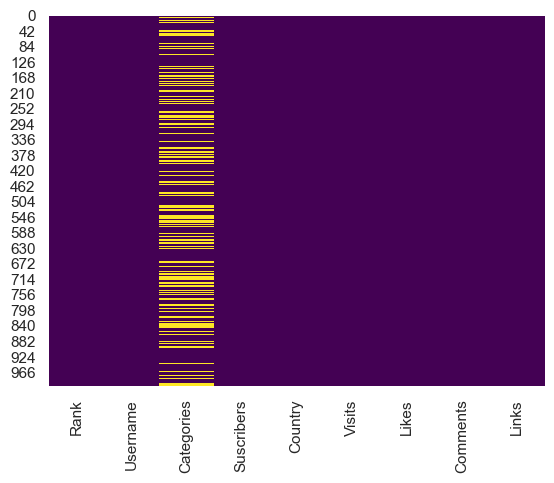

In [14]:
# Visualize missing data using a heatmap
sns.heatmap(youtubers_df.isnull(), cbar=False, cmap="viridis")
plt.show()

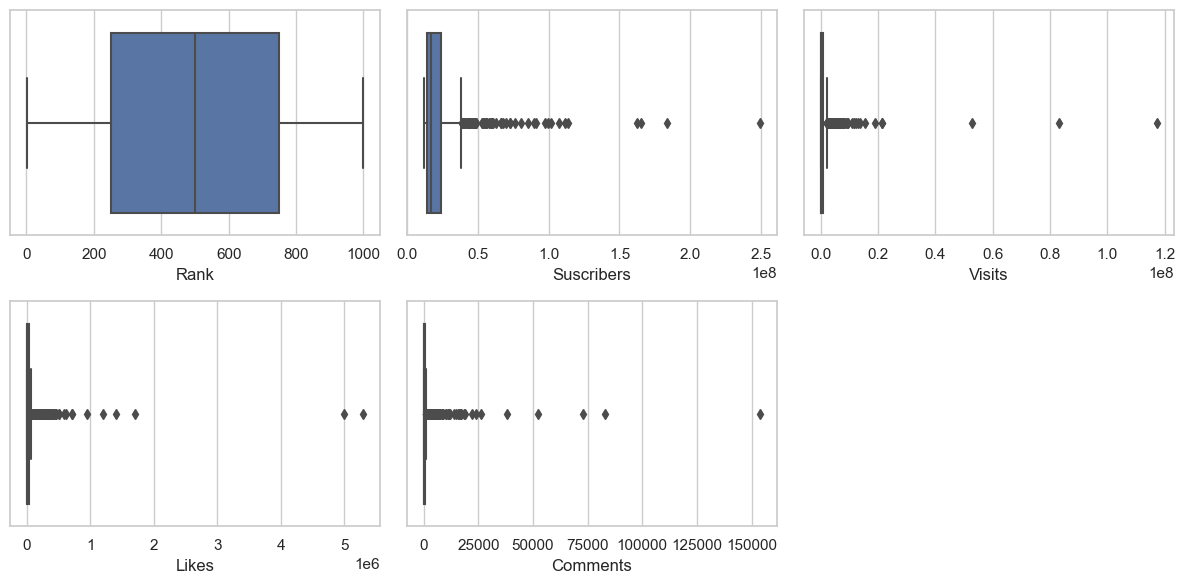

In [15]:
# Visualize outliers using box plots
sns.set(style="whitegrid")
numerical_columns = youtubers_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=youtubers_df[col])

plt.tight_layout()
plt.show()

# 2. Trend Analysis:
- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?


In [25]:
# Explore the dataset
print(youtubers_df.head())

   Rank       Username           Categories  Subscribers         Country  \
0     1        tseries       Música y baile    249500000           India   
1     2        MrBeast   Videojuegos, Humor    183500000  Estados Unidos   
2     3      CoComelon            Educación    165500000         Unknown   
3     4       SETIndia                  NaN    162600000           India   
4     5  KidsDianaShow  Animación, Juguetes    113500000         Unknown   

        Visits    Likes  Comments  \
0      86200.0     2700        78   
1  117400000.0  5300000     18500   
2    7000000.0    24700         0   
3      15600.0      166         9   
4    3900000.0    12400         0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk8GzjMOrta8yx

Column Names: Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')
Top Categories:
 Categories
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: count, dtype: int64


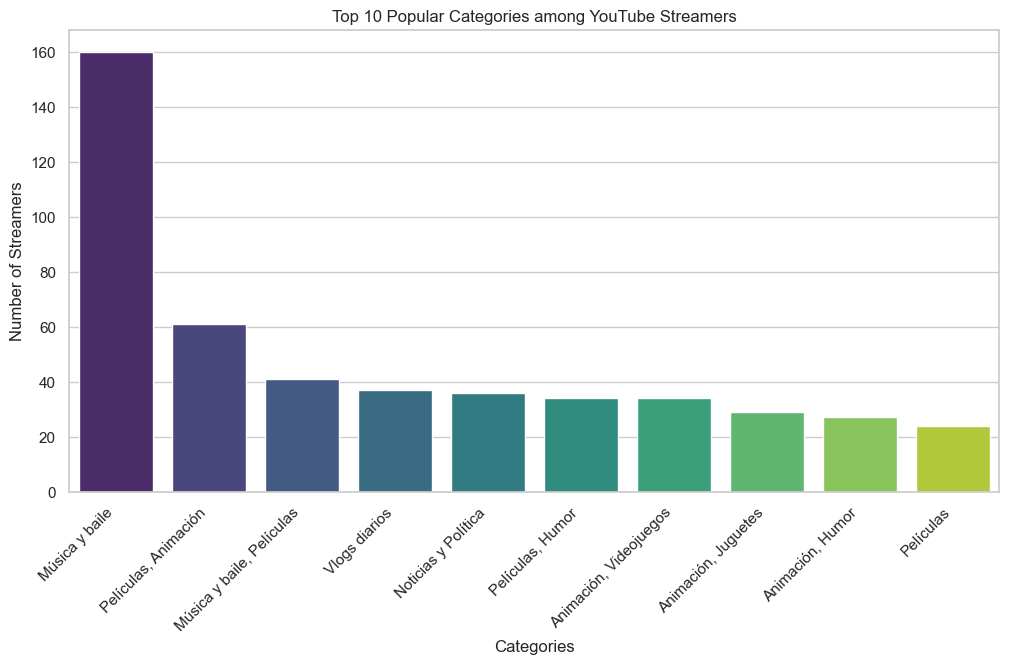

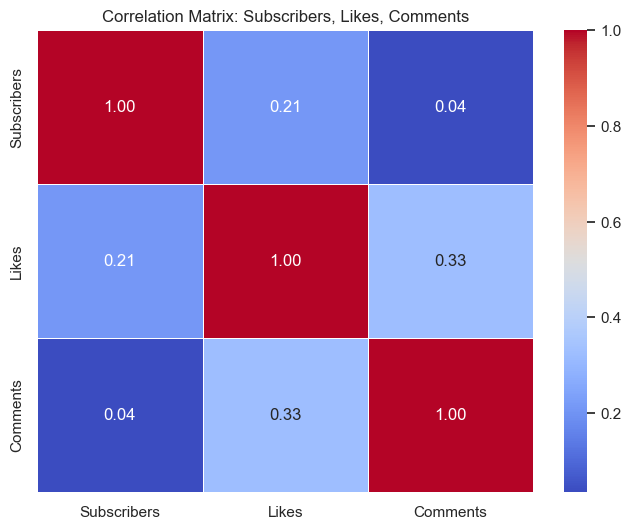

In [28]:
# Explore the dataset and check column names
print("Column Names:", youtubers_df.columns)

if 'Categories' in youtubers_df.columns:
    top_categories = youtubers_df['Categories'].value_counts().head(10)
    print("Top Categories:\n", top_categories)

    # Visualize popular categories
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
    plt.title('Top 10 Popular Categories among YouTube Streamers')
    plt.xlabel('Categories')
    plt.ylabel('Number of Streamers')
    plt.xticks(rotation=45, ha="right")
    plt.show()
else:
    print("Category column not found in the dataset.")

# Analyze correlation between subscribers, likes, and comments
correlation_matrix = youtubers_df[['Subscribers', 'Likes', 'Comments']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Subscribers, Likes, Comments')
plt.show()

# 3. Audience Study:
- Analyze the distribution of streamers' audiences by country. Are there regional preferences for
specific content categories?

Column Names: Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')


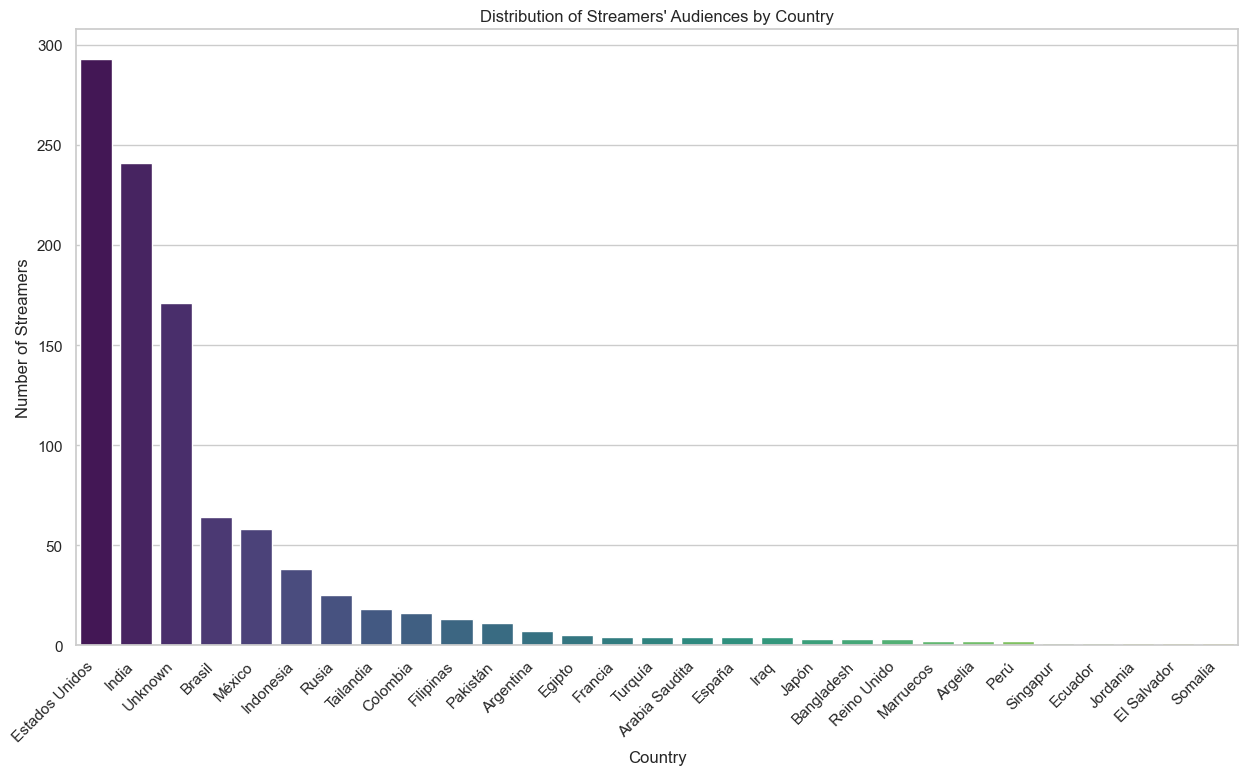

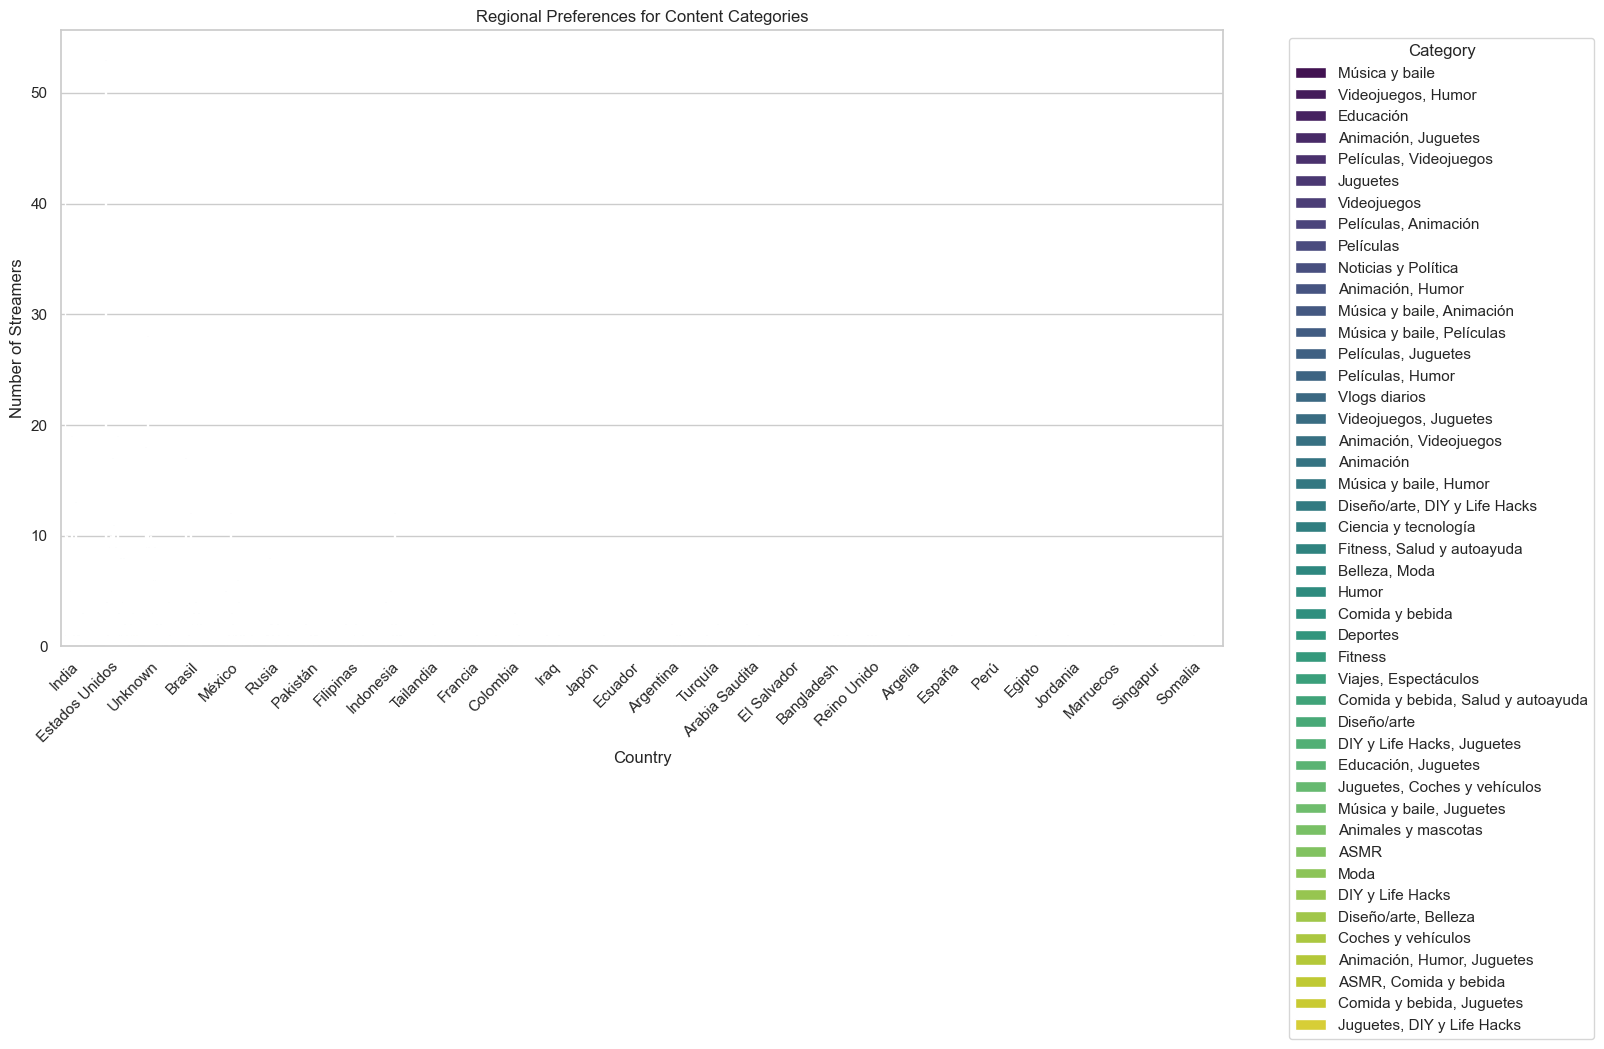

In [30]:
# Explore the dataset and check column names
print("Column Names:", youtubers_df.columns)

# Analyze the distribution of streamers' audiences by country
plt.figure(figsize=(15, 8))
sns.countplot(x='Country', data=youtubers_df, order=youtubers_df['Country'].value_counts().index, palette="viridis")
plt.title('Distribution of Streamers\' Audiences by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha="right")
plt.show()

# Analyze regional preferences for specific content categories
plt.figure(figsize=(15, 8))
sns.countplot(x='Country', hue='Categories', data=youtubers_df, palette="viridis")
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

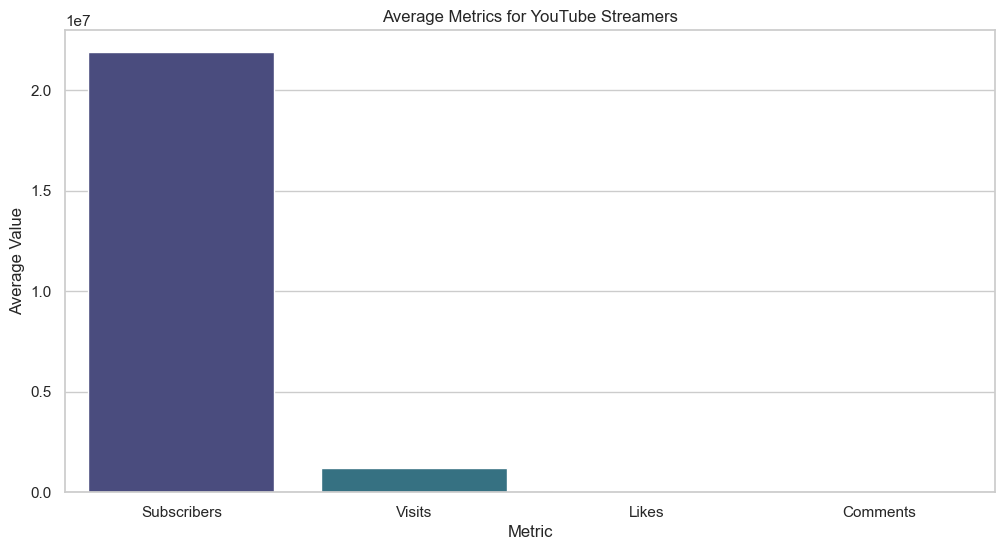

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/si

<Figure size 1200x800 with 0 Axes>

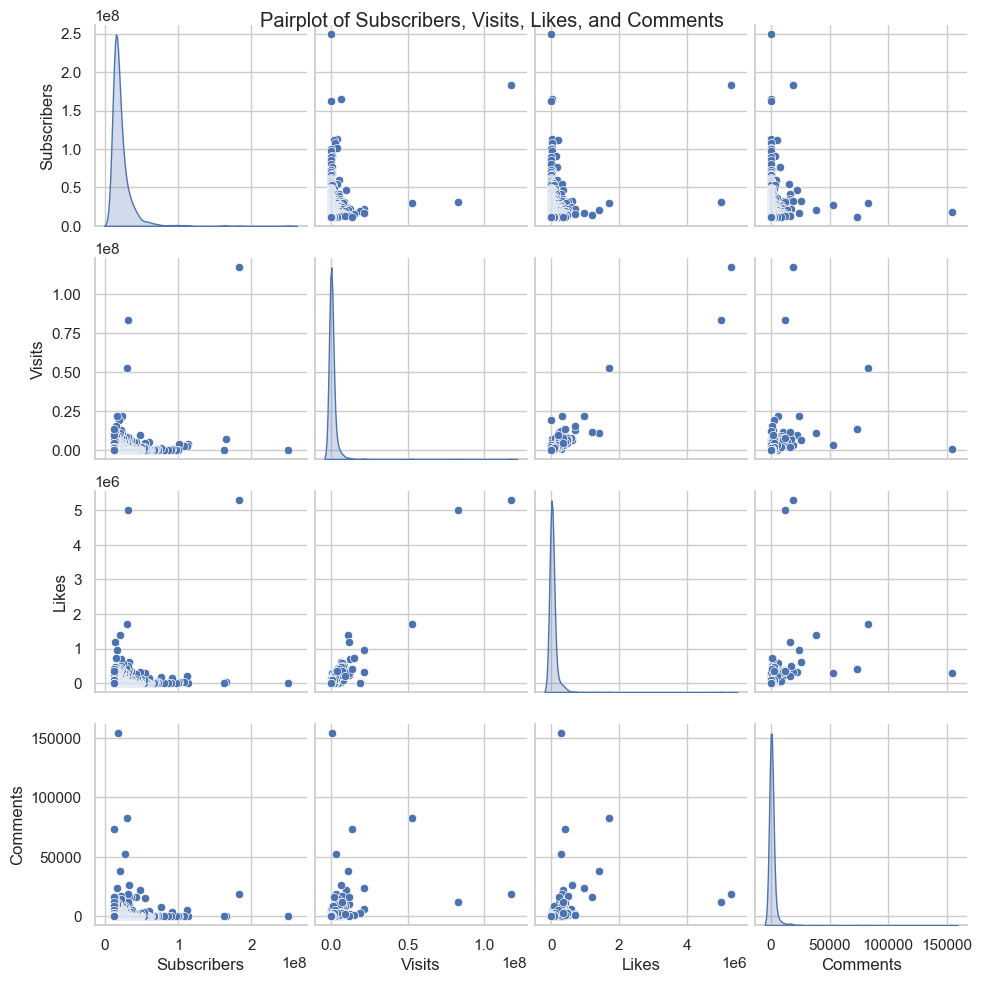

In [31]:
# Calculate average metrics
average_metrics = youtubers_df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Visualize average metrics
plt.figure(figsize=(12, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette="viridis")
plt.title('Average Metrics for YouTube Streamers')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.show()

# Identify patterns or anomalies in metrics
plt.figure(figsize=(12, 8))
sns.pairplot(youtubers_df[['Subscribers', 'Visits', 'Likes', 'Comments']], kind='scatter', diag_kind='kde', palette="viridis")
plt.suptitle('Pairplot of Subscribers, Visits, Likes, and Comments')
plt.show()


# 5. Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

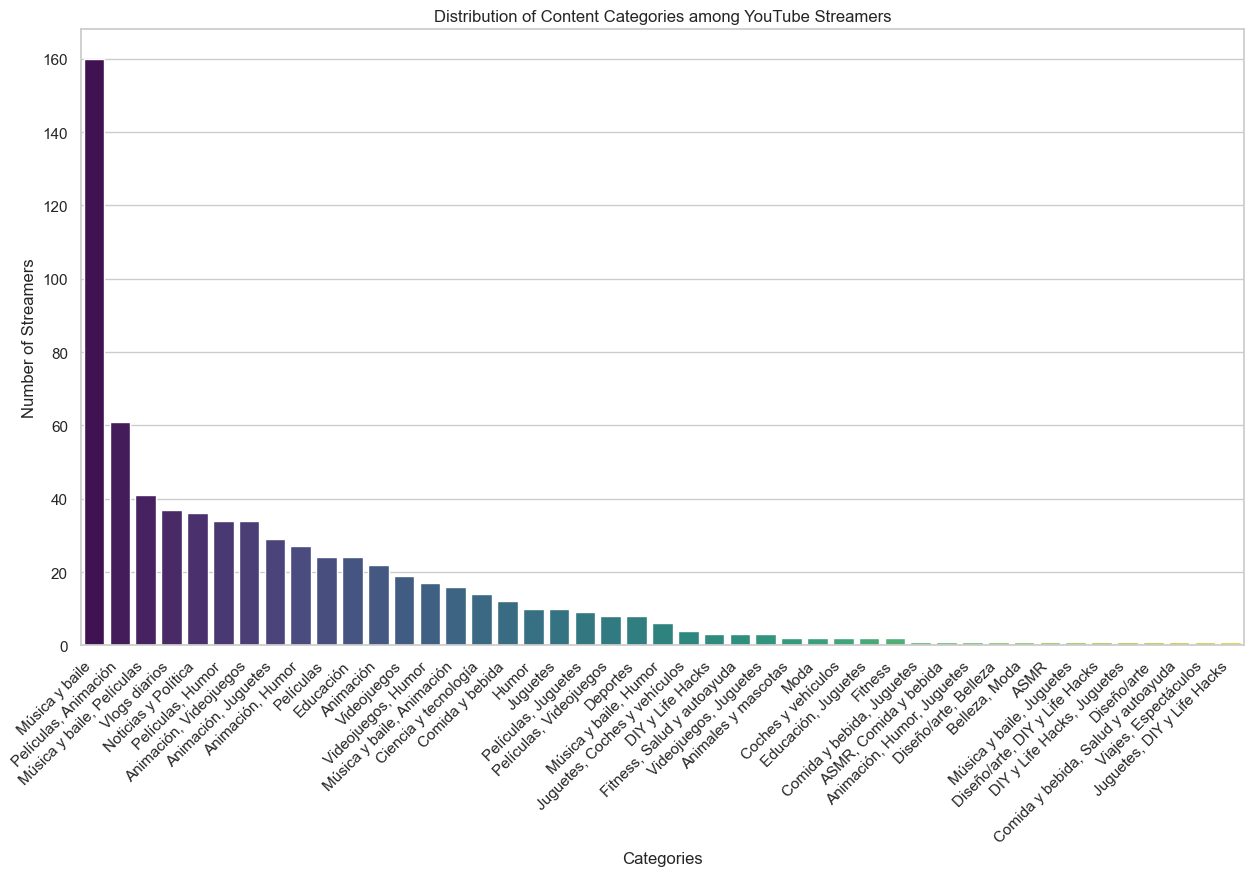

Top Categories by Number of Streamers:
 Categories
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: count, dtype: int64


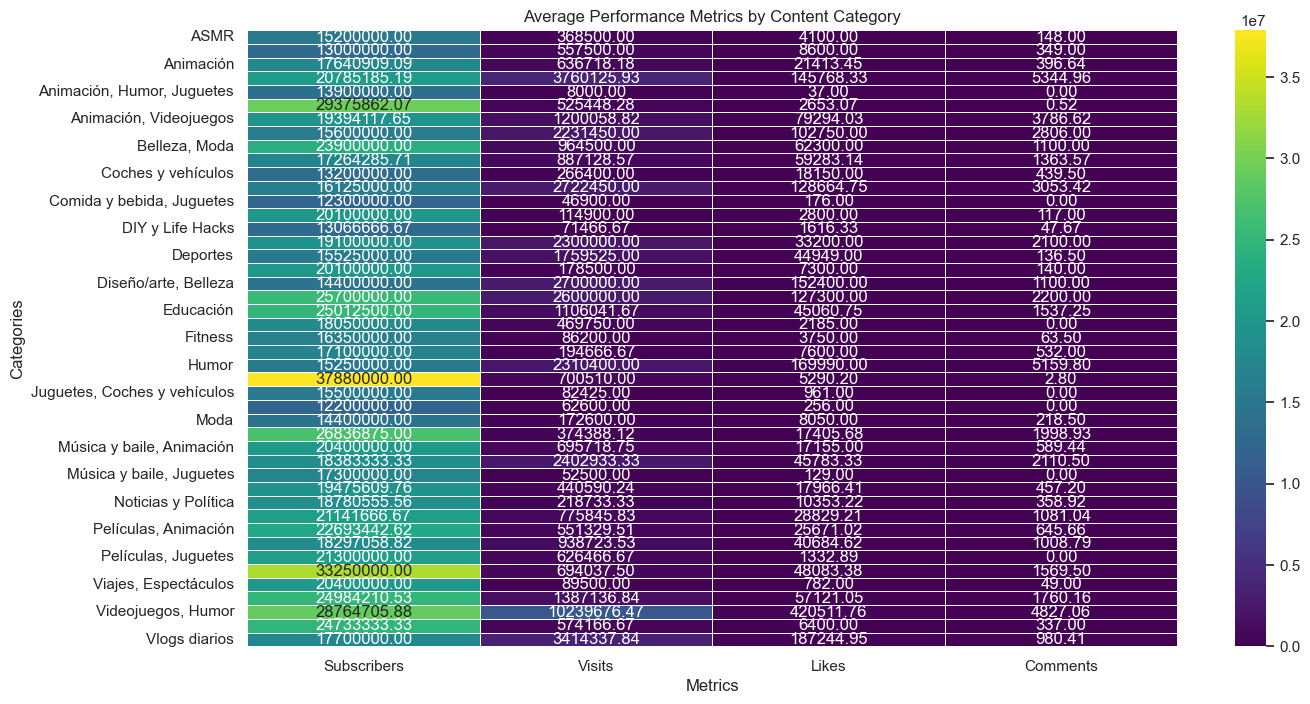

In [32]:
# Explore the distribution of content categories
plt.figure(figsize=(15, 8))
sns.countplot(x='Categories', data=youtubers_df, order=youtubers_df['Categories'].value_counts().index, palette="viridis")
plt.title('Distribution of Content Categories among YouTube Streamers')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha="right")
plt.show()

# Identify categories with the highest number of streamers
top_categories = youtubers_df['Categories'].value_counts().head(10)
print("Top Categories by Number of Streamers:\n", top_categories)

# Explore performance metrics for different categories
average_metrics_by_category = youtubers_df.groupby('Categories')[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Visualize average performance metrics by category
plt.figure(figsize=(15, 8))
sns.heatmap(average_metrics_by_category, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title('Average Performance Metrics by Content Category')
plt.xlabel('Metrics')
plt.ylabel('Categories')
plt.show()

# 6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(

<Figure size 1500x800 with 0 Axes>

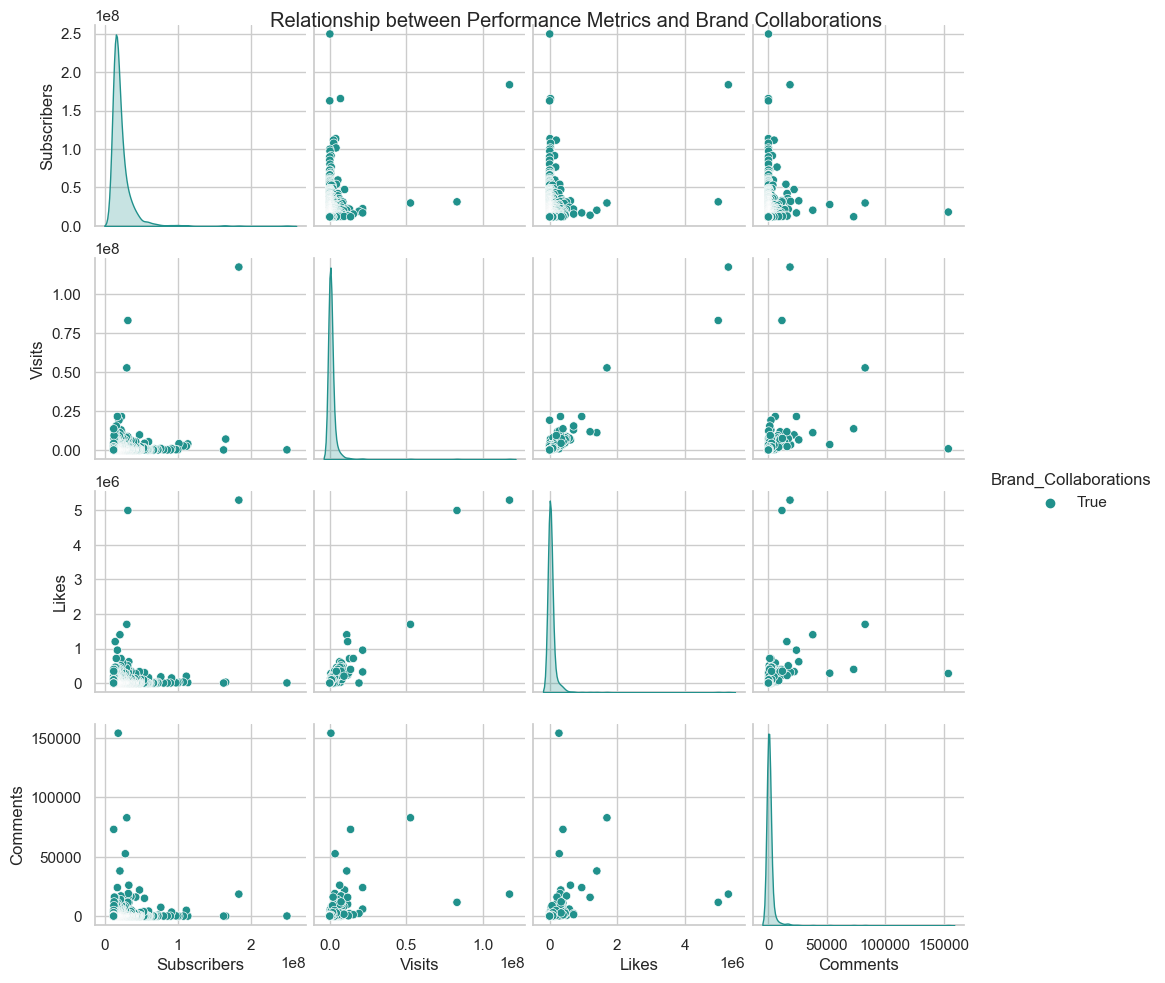

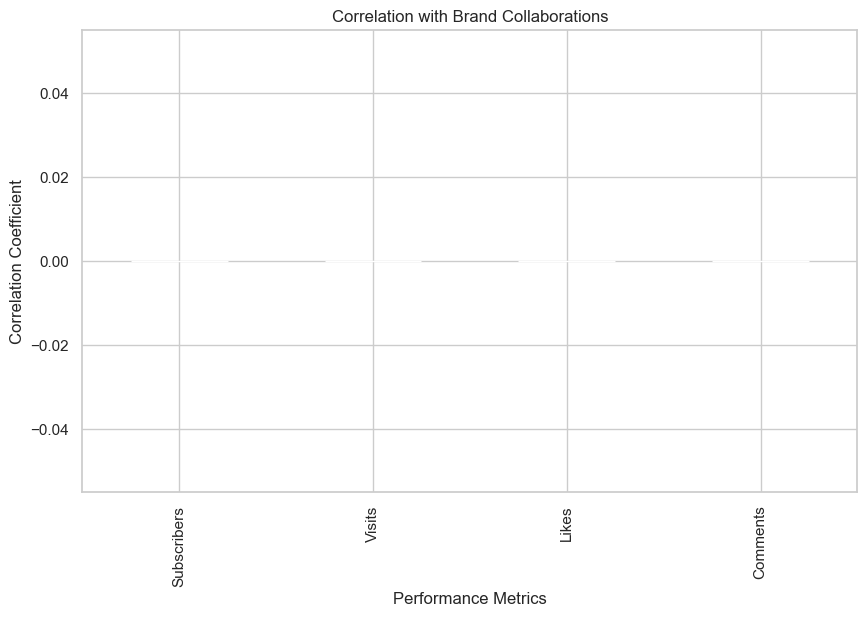

In [35]:
# Define a threshold for subscribers to determine brand collaborations
subscribers_threshold = 1000000  # Adjust as needed

# Create a new column indicating brand collaborations based on the threshold
youtubers_df['Brand_Collaborations'] = youtubers_df['Subscribers'] > subscribers_threshold

# Analyze whether streamers with high performance metrics receive more brand collaborations
performance_metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
brand_collaborations_column = 'Brand_Collaborations'

# Visualize the relationship between performance metrics and brand collaborations
plt.figure(figsize=(15, 8))
sns.pairplot(youtubers_df[[brand_collaborations_column] + performance_metrics], hue=brand_collaborations_column, palette="viridis", markers=["o", "s"])
plt.suptitle('Relationship between Performance Metrics and Brand Collaborations')
plt.show()

# Calculate correlation between performance metrics and brand collaborations
correlation_with_brand_collaborations = youtubers_df[performance_metrics + [brand_collaborations_column]].corr()[brand_collaborations_column]

# Visualize correlation with brand collaborations
plt.figure(figsize=(10, 6))
correlation_with_brand_collaborations.drop(brand_collaborations_column).plot(kind='bar', color='skyblue')
plt.title('Correlation with Brand Collaborations')
plt.xlabel('Performance Metrics')
plt.ylabel('Correlation Coefficient')
plt.show()
#dataset you provided doesn't include a specific column for "Brand_Collaborations,"
#and you want to analyze the relationship between performance metrics and brand collaborations, 
#you can consider creating a new column to represent the presence or absence of brand collaborations
#based on certain criteria. For example, you might define a threshold for each performance metric,
#and if a streamer exceeds that threshold, you mark them as having brand collaborations.

# 7. Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [36]:
# Calculate average values for performance metrics
average_metrics = youtubers_df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = youtubers_df[
    (youtubers_df['Subscribers'] > average_metrics['Subscribers']) &
    (youtubers_df['Visits'] > average_metrics['Visits']) &
    (youtubers_df['Likes'] > average_metrics['Likes']) &
    (youtubers_df['Comments'] > average_metrics['Comments'])
]

# Display the top-performing content creators
top_performers = above_average_streamers[['Rank', 'Username', 'Categories', 'Subscribers', 'Visits', 'Likes', 'Comments']]
print("Top-Performing Content Creators:")
print(top_performers)

Top-Performing Content Creators:
     Rank               Username                     Categories  Subscribers  \
1       2                MrBeast             Videojuegos, Humor    183500000   
5       6              PewDiePie         Películas, Videojuegos    111500000   
26     27            dudeperfect                    Videojuegos     59700000   
34     35            TaylorSwift                 Música y baile     54100000   
39     40            JuegaGerman           Películas, Animación     48600000   
43     44               A4a4a4a4               Animación, Humor     47300000   
58     59              Mikecrack           Películas, Animación     43400000   
62     63         KimberlyLoaiza                 Música y baile     42100000   
64     65        luisitocomunica                            NaN     41100000   
70     71            JessNoLimit           Películas, Animación     39600000   
96     97         TotalGaming093         Películas, Videojuegos     36300000   
98     

# 8. Content Recommendations:
Propose a system for enhancing content recommendations to YouTube users based on streamers'categories and performance metrics

In [ ]:
Incorporate user feedback mechanisms to collect explicit preferences and adjust recommendations accordingly.
Learn from both positive and negative feedback to continuously improve the system.